In [63]:
# import libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import re
import ast
import nltk
nltk.download(['punkt', 'stopwords', 'wordnet', 'omw-1.4'])
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arwao\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [49]:
articles = pd.read_csv('medium_articles.csv')
articles.head()

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
3,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."
4,Surviving a Rod Through the Head,"You’ve heard of him, haven’t you? Phineas Gage...",https://medium.com/live-your-life-on-purpose/s...,['Rishav Sinha'],2020-02-26 00:01:01.576000+00:00,"['Brain', 'Health', 'Development', 'Psychology..."


In [50]:
articles.shape[0]

192368

In [ ]:
# for data visualization or descriptive analysis these questions can be used
# Most common topics in the dataset (clusters)
# Top 10 writers
# rate of articles by month
# Words cloud

In [51]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192368 entries, 0 to 192367
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      192363 non-null  object
 1   text       192368 non-null  object
 2   url        192368 non-null  object
 3   authors    192368 non-null  object
 4   timestamp  192366 non-null  object
 5   tags       192368 non-null  object
dtypes: object(6)
memory usage: 8.8+ MB


## Most common topics in the dataset 

In [52]:
articles['tags'][3]

"['Health', 'Neuroscience', 'Mental Health', 'Psychology', 'Science']"

In [53]:
# lambda function to return list literal
tags_to_list = lambda x: ast.literal_eval(x)

# apply the lambda function to the 'tags' column
articles['tags'] = articles['tags'].apply(tags_to_list)

print(articles['tags'].head(5))

0    [Mental Health, Health, Psychology, Science, N...
1    [Mental Health, Coronavirus, Science, Psycholo...
2    [Biotechnology, Neuroscience, Brain, Wellness,...
3    [Health, Neuroscience, Mental Health, Psycholo...
4    [Brain, Health, Development, Psychology, Science]
Name: tags, dtype: object


In [54]:
# make list of lists
tags_list = articles['tags'].values.tolist()
tags_list[:5]

[['Mental Health', 'Health', 'Psychology', 'Science', 'Neuroscience'],
 ['Mental Health', 'Coronavirus', 'Science', 'Psychology', 'Neuroscience'],
 ['Biotechnology', 'Neuroscience', 'Brain', 'Wellness', 'Science'],
 ['Health', 'Neuroscience', 'Mental Health', 'Psychology', 'Science'],
 ['Brain', 'Health', 'Development', 'Psychology', 'Science']]

In [55]:
# return unique tags
unique_values = list(set().union(*tags_list))
len(unique_values)

78638

There is around 78000 unique tags, for better visualization we're going to display the top 25 tags

In [42]:
# count number of tags for all lists
flat_list = [x for sublist in tags_list for x in sublist]

# create new dataframe
tags_num = pd.DataFrame({'tags': flat_list})

In [58]:
def top_n_tags(n , tags=tags_num):
    '''
    INPUT:
    tags - pandas dataframe of tags and thier count
    n - (int) number of tags you want to retrive 
    OUTPUT:
    top_tags - pandas dataframe of n tags and count
    
    Description:
    Return a list of top n tags in the dataset 
    '''
    top_tags = tags.value_counts()[:n]
    return top_tags

In [59]:
# store top 25 tags
top25 = top_n_tags(25)

In [66]:
type(top25.index)

pandas.core.indexes.multi.MultiIndex

In [61]:
# changing the format from multi-index to index
index = top25.index.map(''.join)

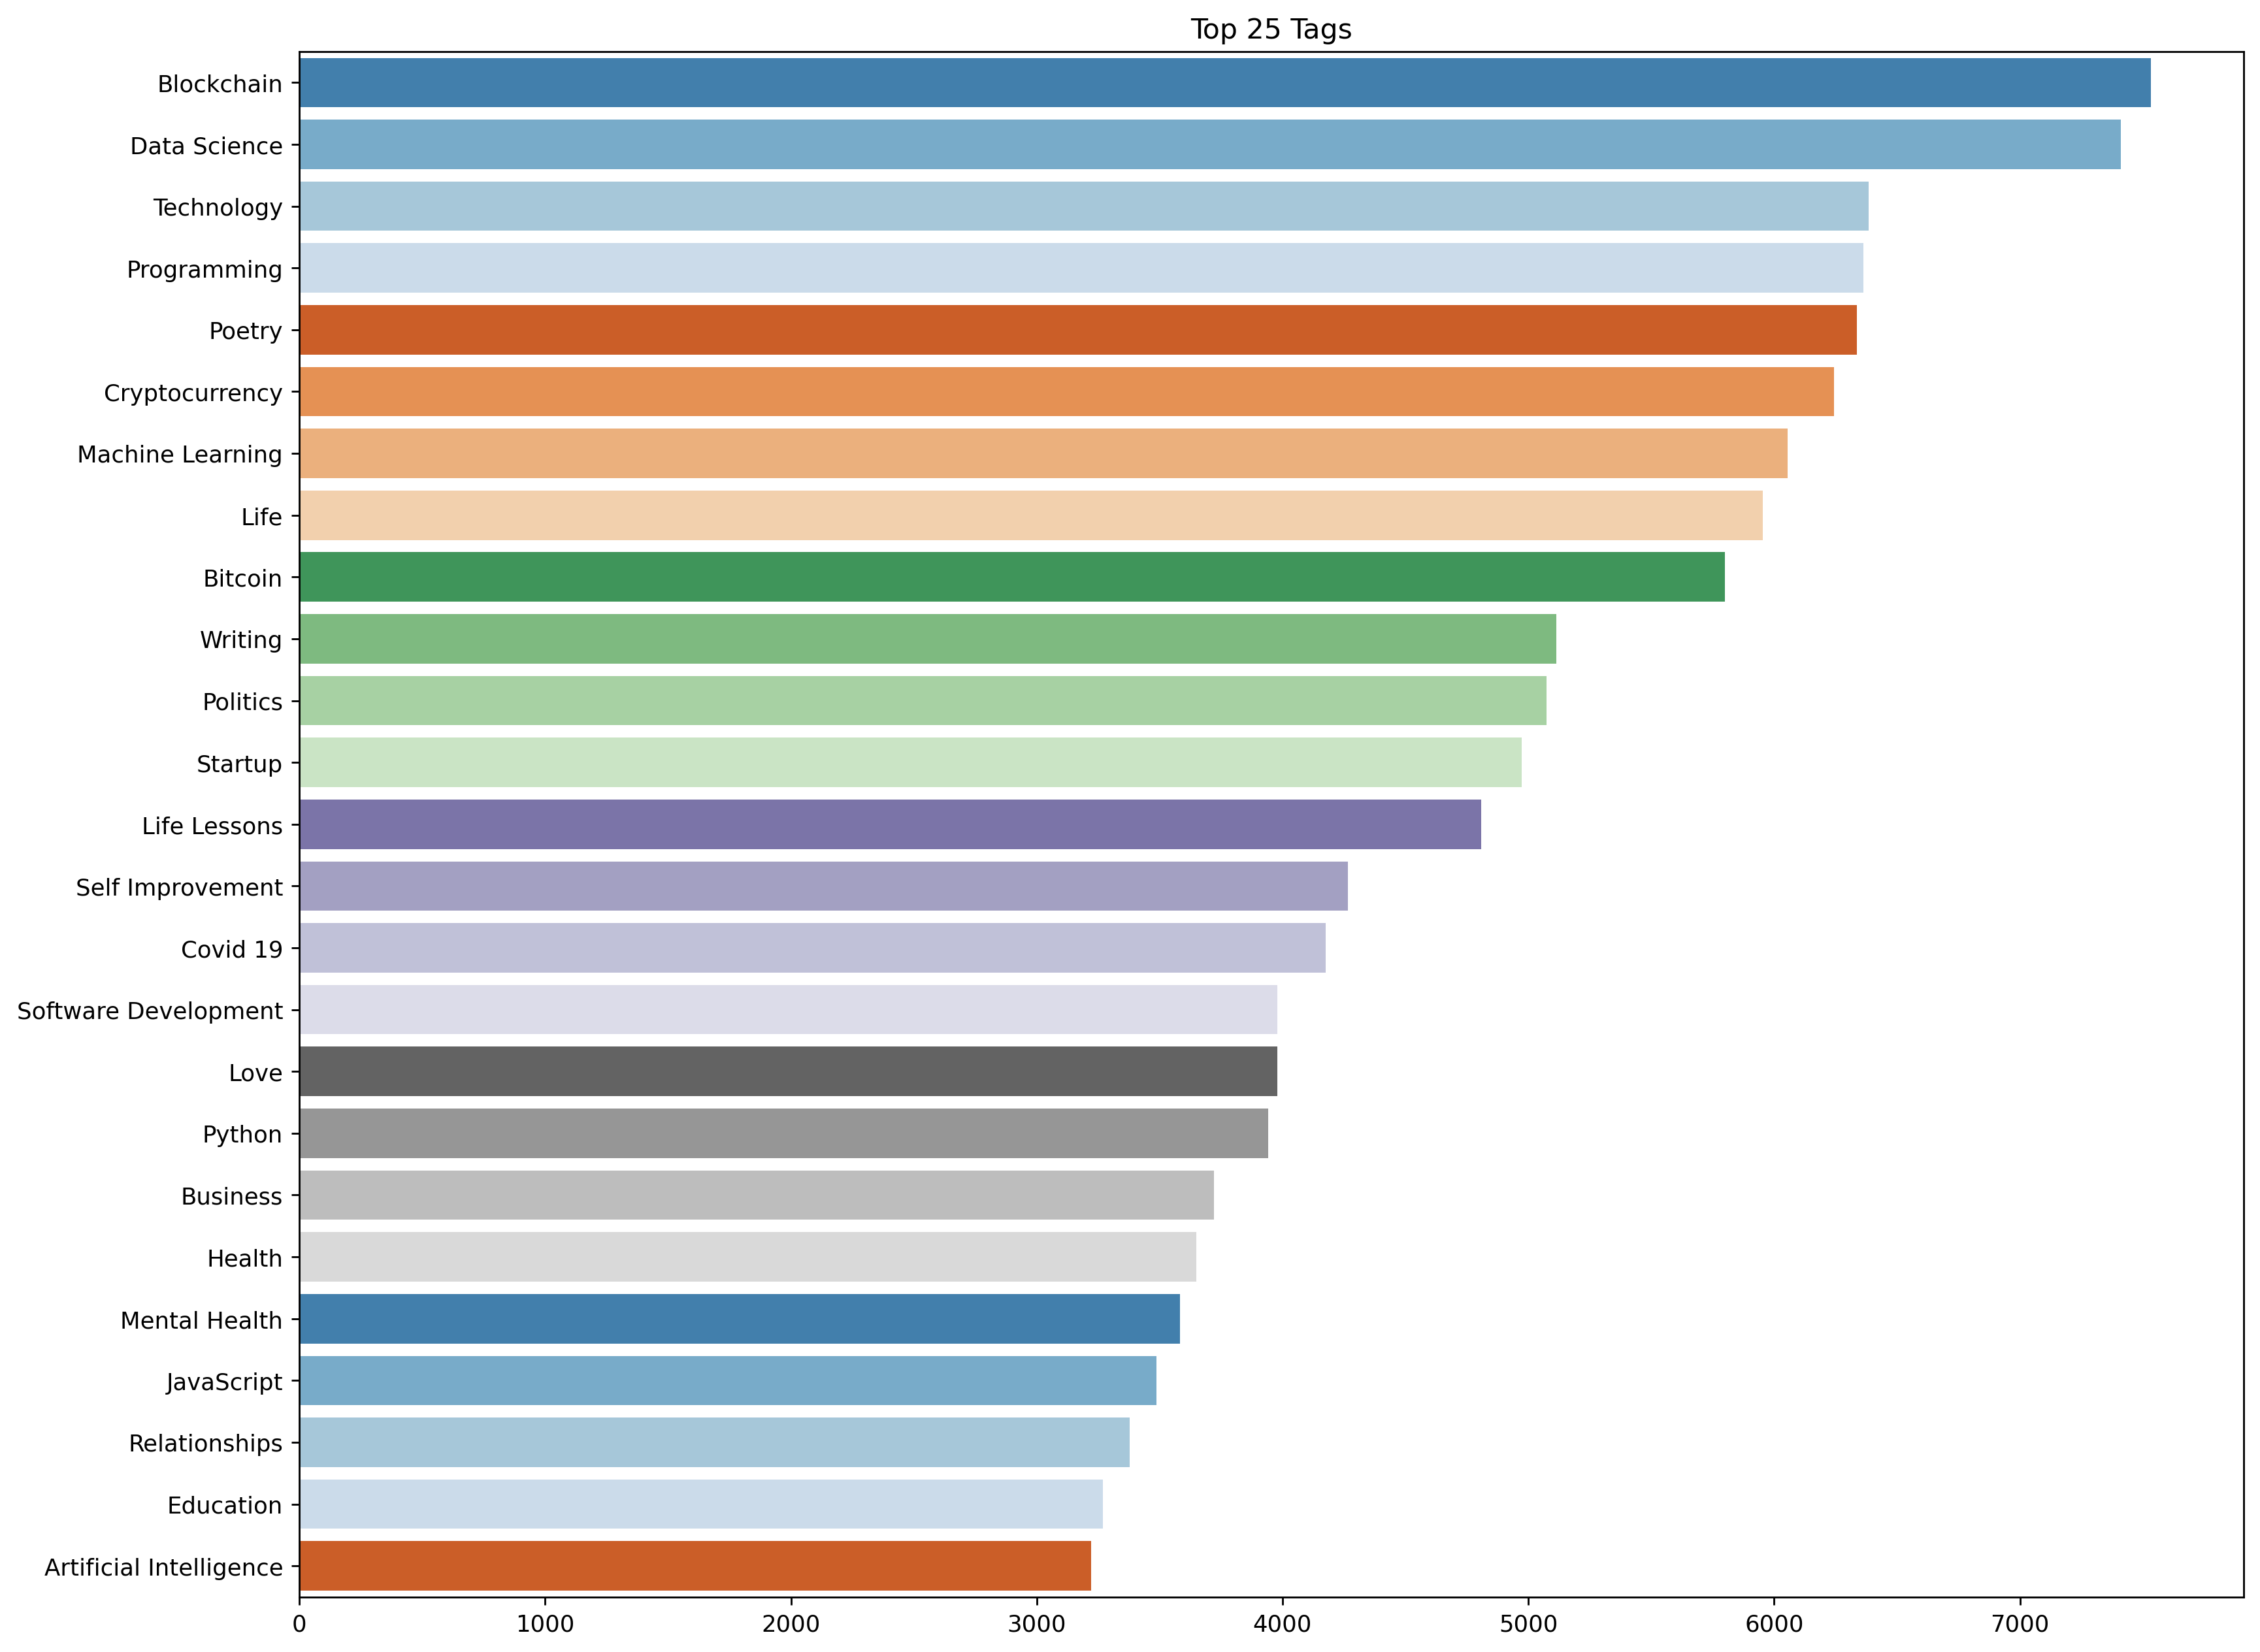

In [82]:
# plot the results 
figure(num=None, figsize=(15,12), dpi=256, facecolor='w', edgecolor='r')
plt.title("Top 25 Tags") #change to top n tags 
sns.barplot(x = top25.values , y = index , palette = 'tab20c')
plt.show()


## Rate of articles by month